In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
plt.rcParams['figure.figsize'] = [10, 10]
import geopandas as gpd
from shapely.geometry import Point, Polygon

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [3]:
raw_cases = pd.read_csv('/home/andres/Documents/JupyterNBs/COVID_19_Data/JHUH_Data/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
raw_deaths = pd.read_csv('/home/andres/Documents/JupyterNBs/COVID_19_Data/JHUH_Data/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
raw_recovered = pd.read_csv('/home/andres/Documents/JupyterNBs/COVID_19_Data/JHUH_Data/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')

In [4]:
raw_cases.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,7/24/20,7/25/20,7/26/20,7/27/20,7/28/20,7/29/20,7/30/20,7/31/20,8/1/20,8/2/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,35981,36036,36157,36263,36368,36471,36542,36675,36710,36710
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,4570,4637,4763,4880,4997,5105,5197,5276,5396,5519
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,26159,26764,27357,27973,28615,29229,29831,30394,30950,31465
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,897,897,897,907,907,918,922,925,925,925
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,880,916,932,950,1000,1078,1109,1148,1164,1199


In [5]:
raw_cases.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Columns: 198 entries, Province/State to 8/2/20
dtypes: float64(2), int64(194), object(2)
memory usage: 411.6+ KB


In [6]:
raw_deaths.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Columns: 198 entries, Province/State to 8/2/20
dtypes: float64(2), int64(194), object(2)
memory usage: 411.6+ KB


In [7]:
geometry = [Point(xy) for xy in zip(raw_cases['Long'], raw_cases['Lat'])]

In [8]:
geometry[:3]

In [9]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

In [10]:
raw_cases.head()


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,7/24/20,7/25/20,7/26/20,7/27/20,7/28/20,7/29/20,7/30/20,7/31/20,8/1/20,8/2/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,35981,36036,36157,36263,36368,36471,36542,36675,36710,36710
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,4570,4637,4763,4880,4997,5105,5197,5276,5396,5519
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,26159,26764,27357,27973,28615,29229,29831,30394,30950,31465
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,897,897,897,907,907,918,922,925,925,925
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,880,916,932,950,1000,1078,1109,1148,1164,1199


In [11]:
geo_cases = gpd.GeoDataFrame(raw_cases, geometry=geometry)

In [12]:
latest_cases = raw_cases.iloc[:,-2]

/home/andres/anaconda3/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
No handles with labels found to put in legend.


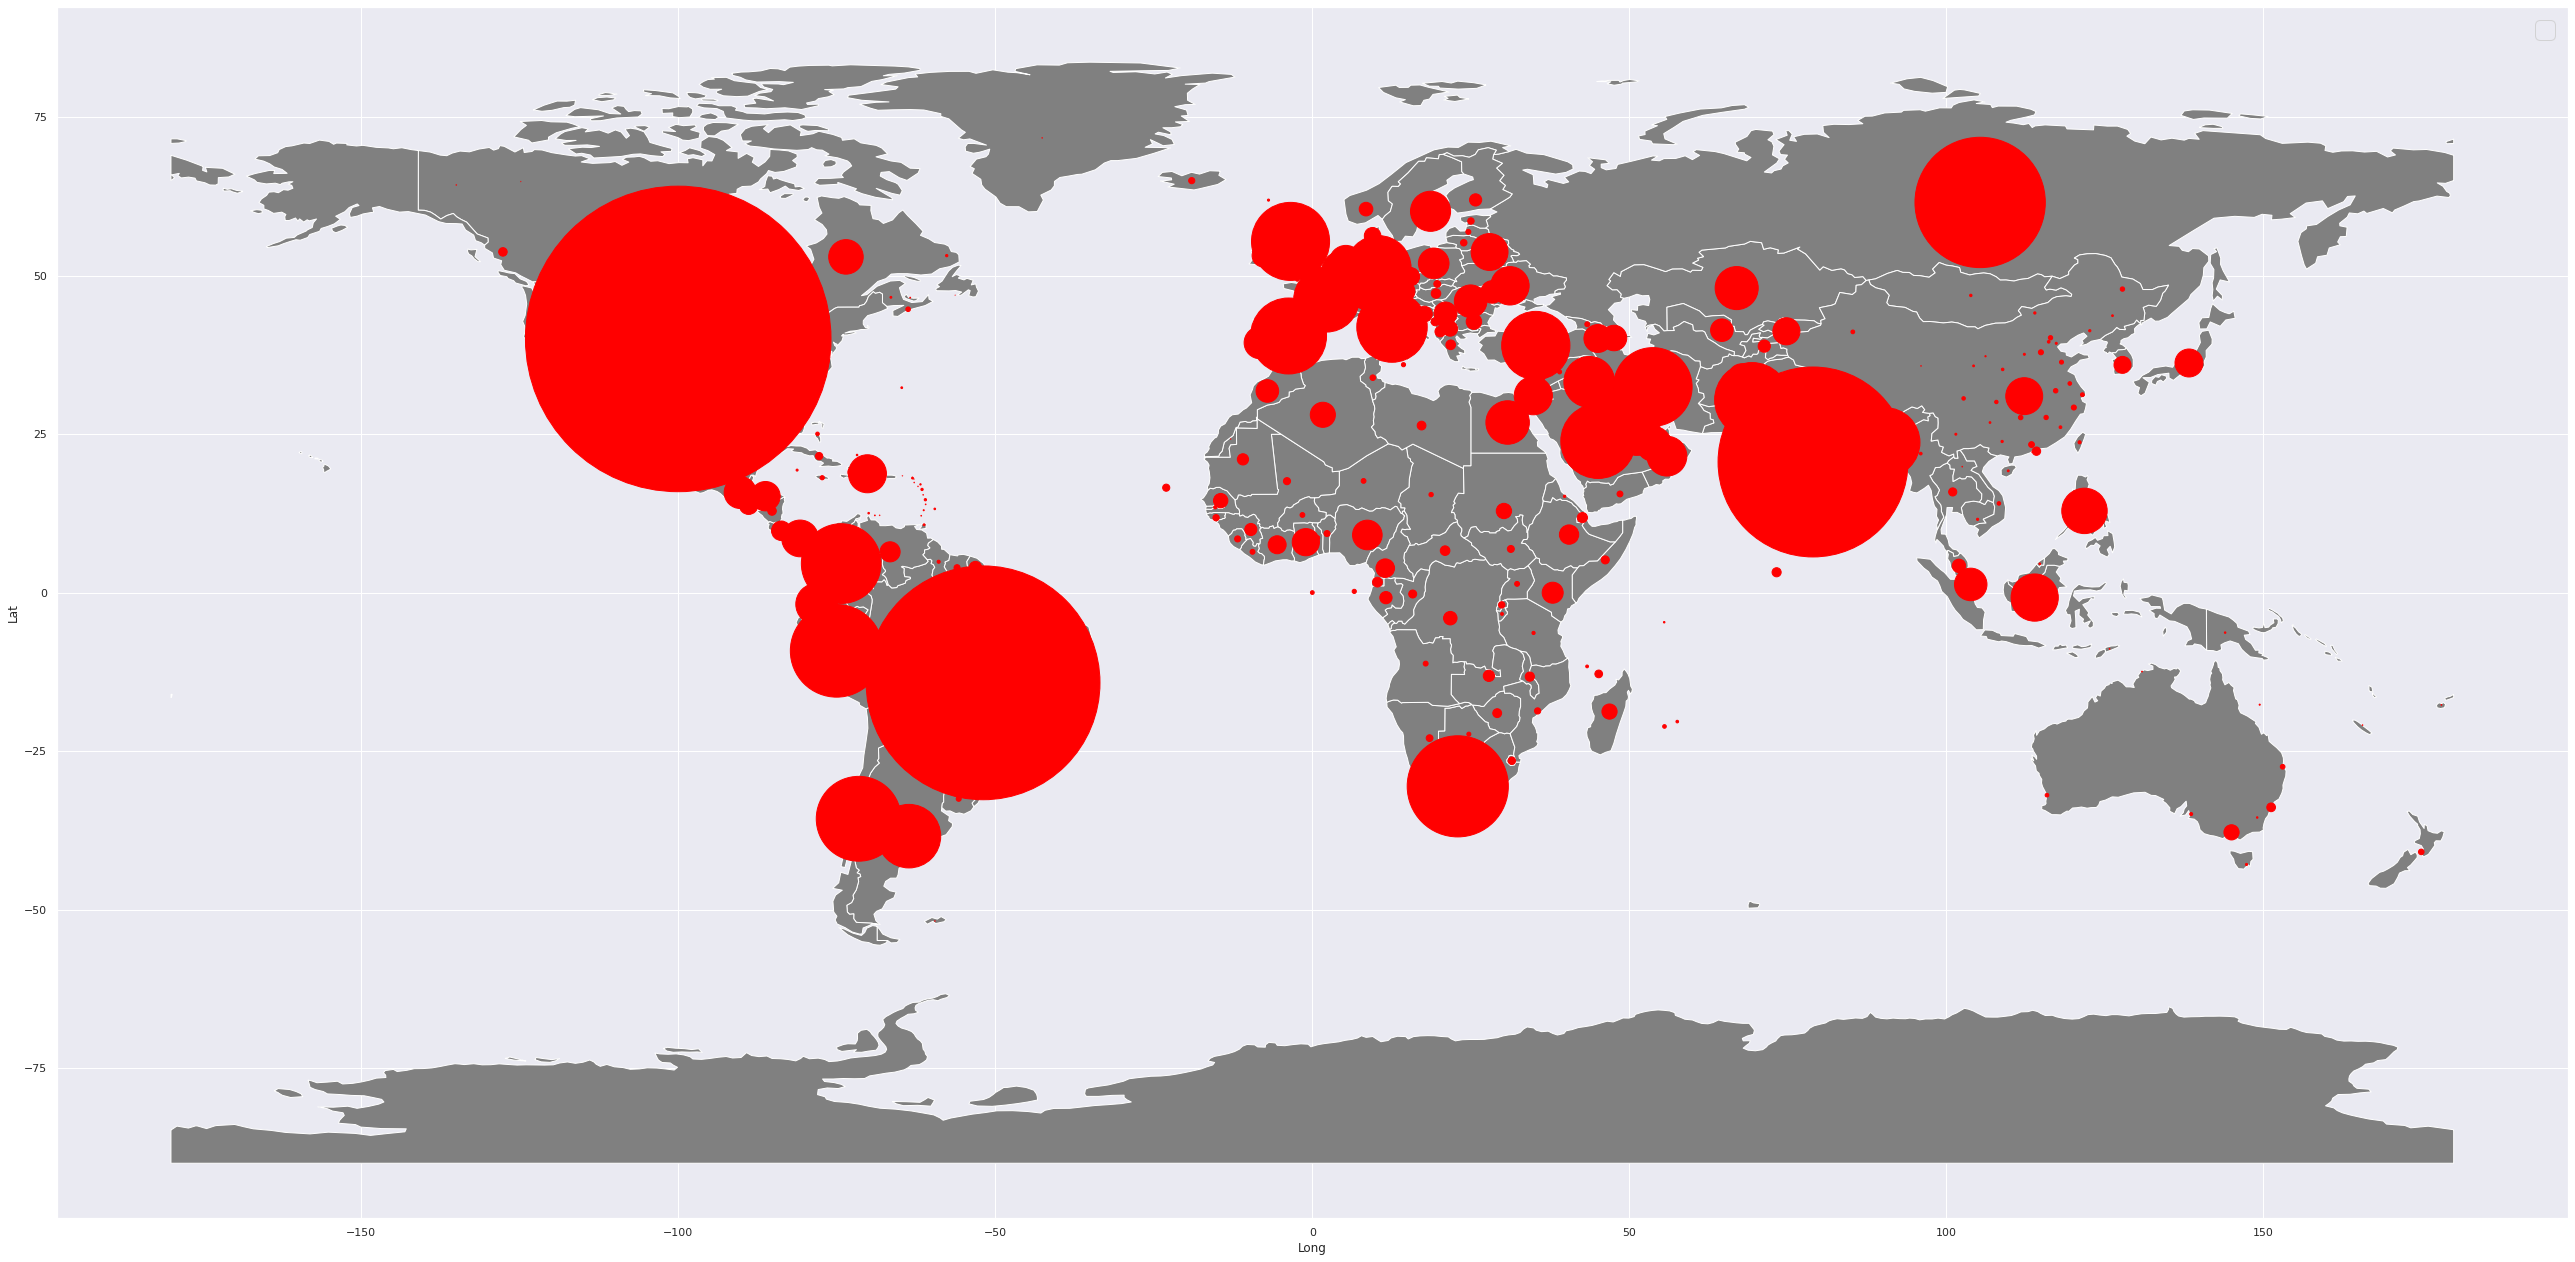

In [13]:
ax = world.plot(figsize=(45,35), color='grey')
geo_cases.crs = {'init' :'epsg:4326'}
geo_cases.to_crs(world.crs)
#geo_cases.plot(ax = ax, color='red')
raw_cases.plot(kind='scatter', x='Long', y='Lat', ax=ax, s=latest_cases/50, legend='Confirmed', color='red')
plt.legend(fontsize=25)
plt.show()

In [14]:


cases_no_states_no_geo = raw_cases.drop(['Province/State','Lat', 'Long'], axis=1)
deaths_no_states_no_geo = raw_deaths.drop(['Province/State', 'Lat', 'Long'], axis=1)
recovered_no_states_no_geo = raw_recovered.drop(['Province/State', 'Lat', 'Long'], axis=1)


In [15]:
grouped_cases = cases_no_states_no_geo.groupby('Country/Region', axis=0)
grouped_deaths = deaths_no_states_no_geo.groupby('Country/Region', axis=0)
grouped_recovered = recovered_no_states_no_geo.groupby('Country/Region', axis=0)

In [16]:
cases_country_only = grouped_cases.sum()
deaths_country_only = grouped_deaths.sum()
recovered_country_only = grouped_recovered.sum()

In [17]:
#Final Data Frames including only countries which we want to study
names_we_want = ['Costa Rica', 'US', 'Italy', 'Spain', 'Germany', 'China', 'Brazil', 'Korea, South', 'France', 'Uruguay']
cases = cases_country_only.loc[names_we_want]
deaths = deaths_country_only.loc[names_we_want]
recovered = recovered_country_only.loc[names_we_want]
cases = cases.T
deaths = deaths.T
recovered = recovered.T

In [18]:
recovered

Country/Region,Costa Rica,US,Italy,Spain,Germany,China,Brazil,"Korea, South",France,Uruguay
1/22/20,0,0,0,0,0,28,0,0,0,0
1/23/20,0,0,0,0,0,30,0,0,0,0
1/24/20,0,0,0,0,0,36,0,0,0,0
1/25/20,0,0,0,0,0,39,0,0,0,0
1/26/20,0,0,0,0,0,49,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
7/29/20,4050,1389425,199031,150376,191279,80594,1922802,13132,81443,967
7/30/20,4280,1414155,199796,150376,191551,80680,1956807,13183,81632,978
7/31/20,4404,1438160,199974,150376,191992,80787,2008854,13233,81764,994
8/1/20,4531,1461885,200229,150376,192636,80907,2037982,13259,81764,1004


In [19]:
cases.to_csv('InternationalCases.csv', index=True)
deaths.to_csv('InternationalDeaths.csv', index=True)
recovered.to_csv('InternationalRecovered.csv', index=True)

In [20]:
cases_camcar = cases_country_only.loc[['Costa Rica', 'Panama', 'Guatemala', 'Nicaragua', 'El Salvador', 'Honduras', 'Dominican Republic', 'Jamaica', 'Trinidad and Tobago', 'Cuba']]
deaths_camcar = deaths_country_only.loc[['Costa Rica', 'Panama', 'Guatemala', 'Nicaragua', 'El Salvador', 'Honduras', 'Dominican Republic', 'Jamaica', 'Trinidad and Tobago', 'Cuba']]
cases_camcar = cases_camcar.T
deaths_camcar = deaths_camcar.T

In [21]:
cases_camcar

Country/Region,Costa Rica,Panama,Guatemala,Nicaragua,El Salvador,Honduras,Dominican Republic,Jamaica,Trinidad and Tobago,Cuba
1/22/20,0,0,0,0,0,0,0,0,0,0
1/23/20,0,0,0,0,0,0,0,0,0,0
1/24/20,0,0,0,0,0,0,0,0,0,0
1/25/20,0,0,0,0,0,0,0,0,0,0
1/26/20,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
7/29/20,16800,63269,47605,3672,15841,40944,66182,856,156,2588
7/30/20,17290,64191,48826,3672,16230,41426,67915,864,164,2597
7/31/20,17820,65256,49789,3672,16632,42014,69649,878,169,2608
8/1/20,18187,66383,50979,3672,17050,42685,71415,883,173,2633


In [22]:
deaths_camcar

Country/Region,Costa Rica,Panama,Guatemala,Nicaragua,El Salvador,Honduras,Dominican Republic,Jamaica,Trinidad and Tobago,Cuba
1/22/20,0,0,0,0,0,0,0,0,0,0
1/23/20,0,0,0,0,0,0,0,0,0,0
1/24/20,0,0,0,0,0,0,0,0,0,0
1/25/20,0,0,0,0,0,0,0,0,0,0
1/26/20,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
7/29/20,133,1374,1835,116,430,1259,1123,10,8,87
7/30/20,140,1397,1867,116,439,1312,1146,10,8,87
7/31/20,150,1421,1924,116,448,1337,1160,10,8,87
8/1/20,154,1449,1959,116,459,1368,1170,10,8,87


In [23]:
cases_camcar = cases_camcar.loc['2/29/20':]
deaths_camcar = deaths_camcar.loc['2/29/20':]

In [24]:
cases_camcar

Country/Region,Costa Rica,Panama,Guatemala,Nicaragua,El Salvador,Honduras,Dominican Republic,Jamaica,Trinidad and Tobago,Cuba
2/29/20,0,0,0,0,0,0,0,0,0,0
3/1/20,0,0,0,0,0,0,1,0,0,0
3/2/20,0,0,0,0,0,0,1,0,0,0
3/3/20,0,0,0,0,0,0,1,0,0,0
3/4/20,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
7/29/20,16800,63269,47605,3672,15841,40944,66182,856,156,2588
7/30/20,17290,64191,48826,3672,16230,41426,67915,864,164,2597
7/31/20,17820,65256,49789,3672,16632,42014,69649,878,169,2608
8/1/20,18187,66383,50979,3672,17050,42685,71415,883,173,2633


In [25]:
deaths_camcar

Country/Region,Costa Rica,Panama,Guatemala,Nicaragua,El Salvador,Honduras,Dominican Republic,Jamaica,Trinidad and Tobago,Cuba
2/29/20,0,0,0,0,0,0,0,0,0,0
3/1/20,0,0,0,0,0,0,0,0,0,0
3/2/20,0,0,0,0,0,0,0,0,0,0
3/3/20,0,0,0,0,0,0,0,0,0,0
3/4/20,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
7/29/20,133,1374,1835,116,430,1259,1123,10,8,87
7/30/20,140,1397,1867,116,439,1312,1146,10,8,87
7/31/20,150,1421,1924,116,448,1337,1160,10,8,87
8/1/20,154,1449,1959,116,459,1368,1170,10,8,87


In [26]:
cases_camcar.to_csv('CasesCAMCAR.csv', index=True)
deaths_camcar.to_csv('DeathsCAMCAR.csv', index=True)

In [27]:
def growth_factor_df(df):
    indices = df.index.values
    cols = df.columns.values
    zeros = np.zeros(df.shape)
    rows = df.shape[0]
    columns = df.shape[1]
    for j in range(columns):
        for i in range(1,rows):
            day_n = df.iloc[i,j]
            day_prev = df.iloc[i-1,j]
            if day_prev == 0:
                zeros[i,j] = 0
            else:
                zeros[i,j] = day_n/day_prev
    growth_df = pd.DataFrame(data=zeros, columns=cols, index=indices)
    return growth_df

In [28]:
camcar_gf = growth_factor_df(cases_camcar)

In [29]:
camcar_gf

,Costa Rica,Panama,Guatemala,Nicaragua,El Salvador,Honduras,Dominican Republic,Jamaica,Trinidad and Tobago,Cuba
2/29/20,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3/1/20,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3/2/20,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
3/3/20,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
3/4/20,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...
7/29/20,1.027900,1.016811,1.024843,1.0,1.025573,1.011962,1.023064,1.001170,1.019608,1.012916
7/30/20,1.029167,1.014573,1.025649,1.0,1.024557,1.011772,1.026185,1.009346,1.051282,1.003478
7/31/20,1.030654,1.016591,1.019723,1.0,1.024769,1.014194,1.025532,1.016204,1.030488,1.004236
8/1/20,1.020595,1.017270,1.023901,1.0,1.025132,1.015971,1.025356,1.005695,1.023669,1.009586


In [30]:
camcar_gf.to_csv('GrowthFactorCAMCAR.csv', index=True)

In [31]:
temp = raw_cases[0 < raw_cases['Lat']]

In [32]:
temp = temp[ temp['Lat'] < 45]

In [33]:
temp = temp[-45 > temp['Long']]

In [34]:
temp = temp[temp['Long'] > -105]

In [35]:
temp

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,7/25/20,7/26/20,7/27/20,7/28/20,7/29/20,7/30/20,7/31/20,8/1/20,8/2/20,geometry
5,NaN,Antigua and Barbuda,17.060800,-61.796400,0,0,0,0,0,0,...,82,82,86,86,91,91,91,91,91,POINT (-61.79640 17.06080)
18,NaN,Bahamas,25.025885,-78.035889,0,0,0,0,0,0,...,326,342,382,447,484,508,574,599,648,POINT (-78.03589 25.02588)
21,NaN,Barbados,13.193900,-59.543200,0,0,0,0,0,0,...,108,110,110,110,110,110,110,122,132,POINT (-59.54320 13.19390)
41,Nova Scotia,Canada,44.682000,-63.744300,0,0,0,0,0,0,...,1067,1067,1067,1067,1067,1067,1069,1069,1071,POINT (-63.74430 44.68200)
82,NaN,Colombia,4.570900,-74.297300,0,0,0,0,0,0,...,240795,240795,257101,267385,276055,286020,295508,306181,317651,POINT (-74.29730 4.57090)
85,NaN,Costa Rica,9.748900,-83.753400,0,0,0,0,0,0,...,14600,15229,15841,16344,16800,17290,17820,18187,18975,POINT (-83.75340 9.74890)
89,NaN,Cuba,21.521757,-77.781167,0,0,0,0,0,0,...,2478,2495,2532,2555,2588,2597,2608,2633,2646,POINT (-77.78117 21.52176)
96,NaN,Dominican Republic,18.735700,-70.162700,0,0,0,0,0,0,...,60896,62908,64156,64690,66182,67915,69649,71415,72243,POINT (-70.16270 18.73570)
99,NaN,El Salvador,13.794200,-88.896500,0,0,0,0,0,0,...,14221,14630,15035,15446,15841,16230,16632,17050,17448,POINT (-88.89650 13.79420)
107,French Guiana,France,3.933900,-53.125800,0,0,0,0,0,0,...,7332,7332,7514,7562,7647,7728,7799,7857,7857,POINT (-53.12580 3.93390)


In [36]:
temp.drop([41,82,109,113,115,158,190, 204, 217, 222, 225, 227, 232,233,237, 243, 248,249,250,255], axis=0, inplace=True)

In [37]:
temp

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,7/25/20,7/26/20,7/27/20,7/28/20,7/29/20,7/30/20,7/31/20,8/1/20,8/2/20,geometry
5,NaN,Antigua and Barbuda,17.060800,-61.796400,0,0,0,0,0,0,...,82,82,86,86,91,91,91,91,91,POINT (-61.79640 17.06080)
18,NaN,Bahamas,25.025885,-78.035889,0,0,0,0,0,0,...,326,342,382,447,484,508,574,599,648,POINT (-78.03589 25.02588)
21,NaN,Barbados,13.193900,-59.543200,0,0,0,0,0,0,...,108,110,110,110,110,110,110,122,132,POINT (-59.54320 13.19390)
85,NaN,Costa Rica,9.748900,-83.753400,0,0,0,0,0,0,...,14600,15229,15841,16344,16800,17290,17820,18187,18975,POINT (-83.75340 9.74890)
89,NaN,Cuba,21.521757,-77.781167,0,0,0,0,0,0,...,2478,2495,2532,2555,2588,2597,2608,2633,2646,POINT (-77.78117 21.52176)
96,NaN,Dominican Republic,18.735700,-70.162700,0,0,0,0,0,0,...,60896,62908,64156,64690,66182,67915,69649,71415,72243,POINT (-70.16270 18.73570)
99,NaN,El Salvador,13.794200,-88.896500,0,0,0,0,0,0,...,14221,14630,15035,15446,15841,16230,16632,17050,17448,POINT (-88.89650 13.79420)
107,French Guiana,France,3.933900,-53.125800,0,0,0,0,0,0,...,7332,7332,7514,7562,7647,7728,7799,7857,7857,POINT (-53.12580 3.93390)
114,St Martin,France,18.070800,-63.050100,0,0,0,0,0,0,...,49,49,49,49,49,49,53,53,53,POINT (-63.05010 18.07080)
123,NaN,Guatemala,15.783500,-90.230800,0,0,0,0,0,0,...,44492,45053,45309,46451,47605,48826,49789,50979,51306,POINT (-90.23080 15.78350)


In [38]:
len(temp)

22

In [39]:
cases_camcar_all = temp[['Province/State', 'Country/Region']]

In [40]:
cols = temp.columns.values
last_two_days = cols[-3:-1]
last_two_days[0]

'8/1/20'

In [41]:
cases_camcar_all[[last_two_days[0], last_two_days[1]]] = temp.iloc[:,-3:-1]

/home/andres/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [42]:
cases_camcar_all = cases_camcar_all.sort_values(by=[last_two_days[1]], ascending=False).reset_index()

In [43]:
cases_camcar_all = cases_camcar_all.drop('index', axis=1)

In [44]:
cases_camcar_all

,Province/State,Country/Region,8/1/20,8/2/20
0,NaN,Dominican Republic,71415,72243
1,NaN,Panama,66383,67453
2,NaN,Guatemala,50979,51306
3,NaN,Honduras,42685,43197
4,NaN,Costa Rica,18187,18975
5,NaN,El Salvador,17050,17448
6,French Guiana,France,7857,7857
7,NaN,Haiti,7468,7468
8,NaN,Nicaragua,3672,3672
9,NaN,Cuba,2633,2646


In [45]:
cases_camcar_all.to_csv('All_CAMCAR_Cases.csv', index=True)

In [46]:
temp_deaths = raw_deaths[0 < raw_deaths['Lat']]

In [47]:
temp_deaths = temp_deaths[ temp_deaths['Lat'] < 45]
temp_deaths = temp_deaths[-45 > temp_deaths['Long']]
temp_deaths = temp_deaths[temp_deaths['Long'] > -105]

In [48]:
temp_deaths

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,7/24/20,7/25/20,7/26/20,7/27/20,7/28/20,7/29/20,7/30/20,7/31/20,8/1/20,8/2/20
5,NaN,Antigua and Barbuda,17.060800,-61.796400,0,0,0,0,0,0,...,3,3,3,3,3,3,3,3,3,3
18,NaN,Bahamas,25.025885,-78.035889,0,0,0,0,0,0,...,11,11,11,11,11,11,14,14,14,14
21,NaN,Barbados,13.193900,-59.543200,0,0,0,0,0,0,...,7,7,7,7,7,7,7,7,7,7
41,Nova Scotia,Canada,44.682000,-63.744300,0,0,0,0,0,0,...,63,63,63,63,63,64,64,64,64,64
82,NaN,Colombia,4.570900,-74.297300,0,0,0,0,0,0,...,7975,8269,8269,8777,9074,9454,9810,10105,10330,10650
85,NaN,Costa Rica,9.748900,-83.753400,0,0,0,0,0,0,...,87,98,104,115,125,133,140,150,154,162
89,NaN,Cuba,21.521757,-77.781167,0,0,0,0,0,0,...,87,87,87,87,87,87,87,87,87,87
96,NaN,Dominican Republic,18.735700,-70.162700,0,0,0,0,0,0,...,1036,1055,1063,1083,1101,1123,1146,1160,1170,1178
99,NaN,El Salvador,13.794200,-88.896500,0,0,0,0,0,0,...,379,390,400,408,417,430,439,448,459,467
107,French Guiana,France,3.933900,-53.125800,0,0,0,0,0,0,...,41,41,41,42,43,43,43,43,43,43


In [49]:
temp_deaths.drop([41,82,109,113,115,158,190, 204, 217, 222, 225, 227, 232,233,237, 243, 248,249,250,255], axis=0, inplace=True)

In [50]:
temp_deaths

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,7/24/20,7/25/20,7/26/20,7/27/20,7/28/20,7/29/20,7/30/20,7/31/20,8/1/20,8/2/20
5,NaN,Antigua and Barbuda,17.060800,-61.796400,0,0,0,0,0,0,...,3,3,3,3,3,3,3,3,3,3
18,NaN,Bahamas,25.025885,-78.035889,0,0,0,0,0,0,...,11,11,11,11,11,11,14,14,14,14
21,NaN,Barbados,13.193900,-59.543200,0,0,0,0,0,0,...,7,7,7,7,7,7,7,7,7,7
85,NaN,Costa Rica,9.748900,-83.753400,0,0,0,0,0,0,...,87,98,104,115,125,133,140,150,154,162
89,NaN,Cuba,21.521757,-77.781167,0,0,0,0,0,0,...,87,87,87,87,87,87,87,87,87,87
96,NaN,Dominican Republic,18.735700,-70.162700,0,0,0,0,0,0,...,1036,1055,1063,1083,1101,1123,1146,1160,1170,1178
99,NaN,El Salvador,13.794200,-88.896500,0,0,0,0,0,0,...,379,390,400,408,417,430,439,448,459,467
107,French Guiana,France,3.933900,-53.125800,0,0,0,0,0,0,...,41,41,41,42,43,43,43,43,43,43
114,St Martin,France,18.070800,-63.050100,0,0,0,0,0,0,...,3,3,3,3,3,3,3,3,3,3
123,NaN,Guatemala,15.783500,-90.230800,0,0,0,0,0,0,...,1669,1699,1734,1761,1782,1835,1867,1924,1959,1995


In [51]:
deaths_camcar_all = temp_deaths[['Province/State', 'Country/Region']]

In [52]:
cols = temp_deaths.columns.values
last_two_days = cols[-2:]
last_two_days[0]

'8/1/20'

In [53]:
deaths_camcar_all[[last_two_days[0], last_two_days[1]]] = temp_deaths.iloc[:,-2:]

/home/andres/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [54]:
deaths_camcar_all = deaths_camcar_all.sort_values(by=[last_two_days[1]], ascending=False).reset_index()

In [55]:
deaths_camcar_all = deaths_camcar_all.drop('index', axis=1)

In [56]:
deaths_camcar_all

,Province/State,Country/Region,8/1/20,8/2/20
0,NaN,Guatemala,1959,1995
1,NaN,Panama,1449,1471
2,NaN,Honduras,1368,1377
3,NaN,Dominican Republic,1170,1178
4,NaN,El Salvador,459,467
5,NaN,Haiti,165,165
6,NaN,Costa Rica,154,162
7,NaN,Nicaragua,116,116
8,NaN,Cuba,87,87
9,French Guiana,France,43,43


In [57]:
deaths_camcar_all.to_csv('All_CAMCAR_Deaths.csv', index=True)

In [58]:
temp_recovered = raw_recovered[0 < raw_recovered['Lat']]
temp_recovered = temp_recovered[ temp_recovered['Lat'] < 45]
temp_recovered = temp_recovered[-45 > temp_recovered['Long']]
temp_recovered = temp_recovered[temp_recovered['Long'] > -105]
temp_recovered

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,7/24/20,7/25/20,7/26/20,7/27/20,7/28/20,7/29/20,7/30/20,7/31/20,8/1/20,8/2/20
5,NaN,Antigua and Barbuda,17.060800,-61.796400,0,0,0,0,0,0,...,60,60,60,65,65,67,67,67,67,67
18,NaN,Bahamas,25.025885,-78.035889,0,0,0,0,0,0,...,91,91,91,91,91,91,91,91,91,91
21,NaN,Barbados,13.193900,-59.543200,0,0,0,0,0,0,...,94,94,94,94,94,95,96,96,98,98
24,NaN,Belize,17.189900,-88.497600,0,0,0,0,0,0,...,26,26,26,26,27,27,27,30,30,30
73,NaN,Colombia,4.570900,-74.297300,0,0,0,0,0,0,...,113864,119667,119667,131161,136690,142777,148695,154387,160708,167239
76,NaN,Costa Rica,9.748900,-83.753400,0,0,0,0,0,0,...,3505,3640,3736,3824,3920,4050,4280,4404,4531,4585
80,NaN,Cuba,21.521757,-77.781167,0,0,0,0,0,0,...,2341,2345,2349,2351,2352,2353,2355,2355,2367,2369
87,NaN,Dominica,15.415000,-61.371000,0,0,0,0,0,0,...,18,18,18,18,18,18,18,18,18,18
88,NaN,Dominican Republic,18.735700,-70.162700,0,0,0,0,0,0,...,27625,27980,28603,30204,32014,33947,35302,36470,37509,38244
91,NaN,El Salvador,13.794200,-88.896500,0,0,0,0,0,0,...,7415,7549,7648,7778,7903,8071,8206,8362,8495,8634


In [59]:
temp_recovered.drop([24,73,87,101,102,106,114,154,186,188,202,217, 222, 225, 227,235,236,237, 242], axis=0, inplace=True) #'[ 41  82 109 113 115 158 190 204 232 233 244 249 250 251] not found in axis'


In [60]:
temp_recovered

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,7/24/20,7/25/20,7/26/20,7/27/20,7/28/20,7/29/20,7/30/20,7/31/20,8/1/20,8/2/20
5,NaN,Antigua and Barbuda,17.060800,-61.796400,0,0,0,0,0,0,...,60,60,60,65,65,67,67,67,67,67
18,NaN,Bahamas,25.025885,-78.035889,0,0,0,0,0,0,...,91,91,91,91,91,91,91,91,91,91
21,NaN,Barbados,13.193900,-59.543200,0,0,0,0,0,0,...,94,94,94,94,94,95,96,96,98,98
76,NaN,Costa Rica,9.748900,-83.753400,0,0,0,0,0,0,...,3505,3640,3736,3824,3920,4050,4280,4404,4531,4585
80,NaN,Cuba,21.521757,-77.781167,0,0,0,0,0,0,...,2341,2345,2349,2351,2352,2353,2355,2355,2367,2369
88,NaN,Dominican Republic,18.735700,-70.162700,0,0,0,0,0,0,...,27625,27980,28603,30204,32014,33947,35302,36470,37509,38244
91,NaN,El Salvador,13.794200,-88.896500,0,0,0,0,0,0,...,7415,7549,7648,7778,7903,8071,8206,8362,8495,8634
99,French Guiana,France,3.933900,-53.125800,0,0,0,0,0,0,...,5522,5767,5767,6047,6106,6176,6270,6386,6531,6531
107,St Martin,France,18.070800,-63.050100,0,0,0,0,0,0,...,39,41,41,41,41,41,41,41,41,41
116,NaN,Guatemala,15.783500,-90.230800,0,0,0,0,0,0,...,30150,31045,31612,32455,33494,34488,35629,36816,37873,38416


In [61]:
recovered_camcar_all = temp_recovered[['Province/State', 'Country/Region']]
cols_rec = temp_recovered.columns.values
last_two_days = cols_rec[-2:]
last_two_days[0]

'8/1/20'

In [62]:
recovered_camcar_all[[last_two_days[0], last_two_days[1]]] = temp_recovered.iloc[:,-2:]
recovered_camcar_all = recovered_camcar_all.sort_values(by=[last_two_days[1]], ascending=False).reset_index()
recovered_camcar_all = recovered_camcar_all.drop('index', axis=1)
recovered_camcar_all

/home/andres/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,Province/State,Country/Region,8/1/20,8/2/20
0,NaN,Panama,40081,41038
1,NaN,Guatemala,37873,38416
2,NaN,Dominican Republic,37509,38244
3,NaN,El Salvador,8495,8634
4,French Guiana,France,6531,6531
5,NaN,Honduras,5694,5794
6,NaN,Haiti,4606,4606
7,NaN,Costa Rica,4531,4585
8,NaN,Nicaragua,2492,2492
9,NaN,Cuba,2367,2369


In [63]:
recovered_camcar_all.to_csv('All_CAMCAR_Recovered.csv', index=True)

In [64]:
camcar_all_cases_no_geo = temp.drop(['Lat', 'Long', 'geometry'], axis=1)
camcar_all_deaths_no_geo = temp_deaths.drop(['Lat', 'Long'], axis=1)
camcar_all_recovered_no_geo = temp_recovered.drop(['Lat', 'Long'], axis=1)


In [65]:
camcar_all_cases_no_geo.reset_index(inplace=True, drop=True)
camcar_all_deaths_no_geo.reset_index(inplace=True, drop=True) 
camcar_all_recovered_no_geo.reset_index(inplace=True, drop=True)

In [66]:
names_camcar_all_cases_no_geo = camcar_all_cases_no_geo[camcar_all_cases_no_geo['Province/State'].notna()].iloc[:,0]
indices = names_camcar_all_cases_no_geo.index
camcar_all_cases_no_geo.iloc[indices, 1] = names_camcar_all_cases_no_geo
camcar_all_cases_no_geo.drop('Province/State', axis=1, inplace=True)
camcar_all_cases_no_geo

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,7/24/20,7/25/20,7/26/20,7/27/20,7/28/20,7/29/20,7/30/20,7/31/20,8/1/20,8/2/20
0,Antigua and Barbuda,0,0,0,0,0,0,0,0,0,...,82,82,82,86,86,91,91,91,91,91
1,Bahamas,0,0,0,0,0,0,0,0,0,...,316,326,342,382,447,484,508,574,599,648
2,Barbados,0,0,0,0,0,0,0,0,0,...,108,108,110,110,110,110,110,110,122,132
3,Costa Rica,0,0,0,0,0,0,0,0,0,...,13669,14600,15229,15841,16344,16800,17290,17820,18187,18975
4,Cuba,0,0,0,0,0,0,0,0,0,...,2469,2478,2495,2532,2555,2588,2597,2608,2633,2646
5,Dominican Republic,0,0,0,0,0,0,0,0,0,...,59077,60896,62908,64156,64690,66182,67915,69649,71415,72243
6,El Salvador,0,0,0,0,0,0,0,0,0,...,13792,14221,14630,15035,15446,15841,16230,16632,17050,17448
7,French Guiana,0,0,0,0,0,0,0,0,0,...,7251,7332,7332,7514,7562,7647,7728,7799,7857,7857
8,St Martin,0,0,0,0,0,0,0,0,0,...,46,49,49,49,49,49,49,53,53,53
9,Guatemala,0,0,0,0,0,0,0,0,0,...,43283,44492,45053,45309,46451,47605,48826,49789,50979,51306


In [67]:
names_camcar_all_deaths_no_geo = camcar_all_deaths_no_geo[camcar_all_deaths_no_geo['Province/State'].notna()].iloc[:,0]
indices = names_camcar_all_deaths_no_geo.index
camcar_all_deaths_no_geo.iloc[indices, 1] = names_camcar_all_deaths_no_geo
camcar_all_deaths_no_geo.drop('Province/State', axis=1, inplace=True)
camcar_all_deaths_no_geo

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,7/24/20,7/25/20,7/26/20,7/27/20,7/28/20,7/29/20,7/30/20,7/31/20,8/1/20,8/2/20
0,Antigua and Barbuda,0,0,0,0,0,0,0,0,0,...,3,3,3,3,3,3,3,3,3,3
1,Bahamas,0,0,0,0,0,0,0,0,0,...,11,11,11,11,11,11,14,14,14,14
2,Barbados,0,0,0,0,0,0,0,0,0,...,7,7,7,7,7,7,7,7,7,7
3,Costa Rica,0,0,0,0,0,0,0,0,0,...,87,98,104,115,125,133,140,150,154,162
4,Cuba,0,0,0,0,0,0,0,0,0,...,87,87,87,87,87,87,87,87,87,87
5,Dominican Republic,0,0,0,0,0,0,0,0,0,...,1036,1055,1063,1083,1101,1123,1146,1160,1170,1178
6,El Salvador,0,0,0,0,0,0,0,0,0,...,379,390,400,408,417,430,439,448,459,467
7,French Guiana,0,0,0,0,0,0,0,0,0,...,41,41,41,42,43,43,43,43,43,43
8,St Martin,0,0,0,0,0,0,0,0,0,...,3,3,3,3,3,3,3,3,3,3
9,Guatemala,0,0,0,0,0,0,0,0,0,...,1669,1699,1734,1761,1782,1835,1867,1924,1959,1995


In [68]:
names_camcar_all_recovered_no_geo = camcar_all_recovered_no_geo[camcar_all_recovered_no_geo['Province/State'].notna()].iloc[:,0]
indices = names_camcar_all_recovered_no_geo.index
camcar_all_recovered_no_geo.iloc[indices, 1] = names_camcar_all_recovered_no_geo
camcar_all_recovered_no_geo.drop('Province/State', axis=1, inplace=True)
camcar_all_recovered_no_geo

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,7/24/20,7/25/20,7/26/20,7/27/20,7/28/20,7/29/20,7/30/20,7/31/20,8/1/20,8/2/20
0,Antigua and Barbuda,0,0,0,0,0,0,0,0,0,...,60,60,60,65,65,67,67,67,67,67
1,Bahamas,0,0,0,0,0,0,0,0,0,...,91,91,91,91,91,91,91,91,91,91
2,Barbados,0,0,0,0,0,0,0,0,0,...,94,94,94,94,94,95,96,96,98,98
3,Costa Rica,0,0,0,0,0,0,0,0,0,...,3505,3640,3736,3824,3920,4050,4280,4404,4531,4585
4,Cuba,0,0,0,0,0,0,0,0,0,...,2341,2345,2349,2351,2352,2353,2355,2355,2367,2369
5,Dominican Republic,0,0,0,0,0,0,0,0,0,...,27625,27980,28603,30204,32014,33947,35302,36470,37509,38244
6,El Salvador,0,0,0,0,0,0,0,0,0,...,7415,7549,7648,7778,7903,8071,8206,8362,8495,8634
7,French Guiana,0,0,0,0,0,0,0,0,0,...,5522,5767,5767,6047,6106,6176,6270,6386,6531,6531
8,St Martin,0,0,0,0,0,0,0,0,0,...,39,41,41,41,41,41,41,41,41,41
9,Guatemala,0,0,0,0,0,0,0,0,0,...,30150,31045,31612,32455,33494,34488,35629,36816,37873,38416


In [69]:
camcar_all_cases_no_geo.set_index('Country/Region', inplace=True)
camcar_all_deaths_no_geo.set_index('Country/Region', inplace=True)
camcar_all_recovered_no_geo.set_index('Country/Region', inplace=True)

In [70]:
cases_camcar_all = camcar_all_cases_no_geo.T.loc['2/29/20':]
deaths_camcar_all = camcar_all_deaths_no_geo.T.loc['2/29/20':]
recovered_camcar_all = camcar_all_recovered_no_geo.T.loc['2/29/20':]

In [71]:
cases_camcar_all.to_csv('Cases_Time_Series_CAMCAR_All.csv', index=True)
deaths_camcar_all.to_csv('Deaths_Time_Series_CAMCAR_All.csv', index=True)
recovered_camcar_all.to_csv('Recovered_Time_Series_CAMCAR_All.csv', index=True)

In [72]:
gf_camcar_all = growth_factor_df(cases_camcar_all)
gf_camcar_all.to_csv('Growth_Factor_CAMCAR_All.csv', index=True)

In [73]:
active_camcar_all = cases_camcar_all - deaths_camcar_all - recovered_camcar_all
active_camcar_all.to_csv('Active_CAMCAR_All.csv', index=True)

In [74]:
cases_camcar_all.shape

(156, 22)

In [75]:
recovered_camcar_all.shape

(156, 22)

In [76]:
deaths_camcar_all.shape

(156, 22)

In [77]:
active_camcar_all.shape

(156, 22)